# Supply Chain Management ; Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('supply_train.csv')
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [7]:
df.shape

(16620, 25)

In [9]:
df.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [11]:
printmd('**Number of unique values** \n')
for col in df.columns:
    length = len(df[f'{col}'].unique())
    print(f'{col} : {length} ')

**Number of unique values** 


Unnamed: 0 : 16620 
Ware_house_ID : 16620 
WH_Manager_ID : 16620 
Location_type : 2 
WH_capacity_size : 3 
zone : 4 
WH_regional_zone : 6 
num_refill_req_l3m : 9 
transport_issue_l1y : 6 
Competitor_in_mkt : 12 
retail_shop_num : 4356 
wh_owner_type : 2 
distributor_num : 56 
flood_impacted : 2 
flood_proof : 2 
electric_supply : 2 
dist_from_hub : 217 
workers_num : 61 
wh_est_year : 29 
storage_issue_reported_l3m : 37 
temp_reg_mach : 2 
approved_wh_govt_certificate : 6 
wh_breakdown_l3m : 7 
govt_check_l3m : 32 
product_wg_ton : 4248 


In [8]:
printmd('**Unique values** \n')
for col in df.columns:
    values = df[f'{col}'].unique()
    print(f'{col} : {values} \n')

**Unique values** 


Unnamed: 0 : [    0     1     2 ... 16617 16618 16619] 

Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619'] 

WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619'] 

Location_type : ['Urban' 'Rural'] 

WH_capacity_size : ['Small' 'Large' 'Mid'] 

zone : ['West' 'North' 'South' 'East'] 

WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4'] 

num_refill_req_l3m : [3 0 1 7 8 4 6 5 2] 

transport_issue_l1y : [1 0 4 3 2 5] 

Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0] 

retail_shop_num : [4651 6217 4306 ... 2716 8344 7347] 

wh_owner_type : ['Rented' 'Company Owned'] 

distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20] 

flood_impacted : [0 1] 

flood_proof : [1 0] 

electric_supply : [1 0] 

dist_from_hub : [ 91 210 161 103 112 152  7

In [12]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [13]:
palette_color = sns.color_palette("Accent")

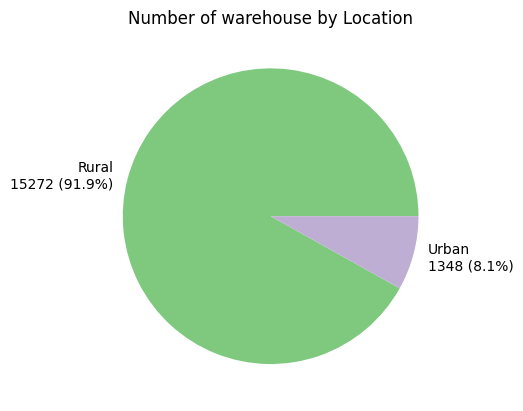

In [14]:
loc_count = df.Location_type.value_counts()

total_wh = sum(loc_count)
wh_percentages = [(size_wh / total_wh) * 100 for size_wh in loc_count]

count_percent = [f'{label}\n{size} ({percentage:.1f}%)' for 
                label, size, percentage in zip(loc_count.index, loc_count, wh_percentages)]

plt.pie(x=loc_count, labels=count_percent, colors=palette_color)
                                 
plt.title('Number of warehouse by Location')

plt.show()

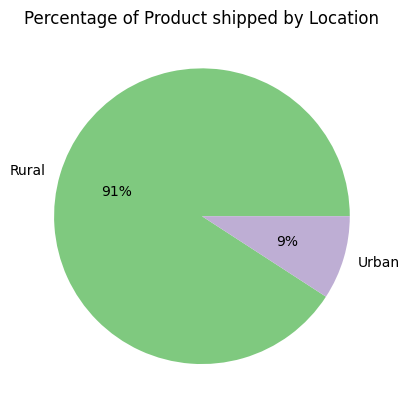

In [15]:
loc_group = df.groupby(['Location_type'])

loc_group_sum = loc_group.sum(numeric_only=True)

plt.pie(x = loc_group_sum['product_wg_ton'], labels = loc_group_sum['product_wg_ton'].index, 
        autopct = '%.0f%%', colors = palette_color)

plt.title('Percentage of Product shipped by Location')

plt.show()

##### About 92% of warehouses are in rural areas, and about 91% of the total products are shipped from here.

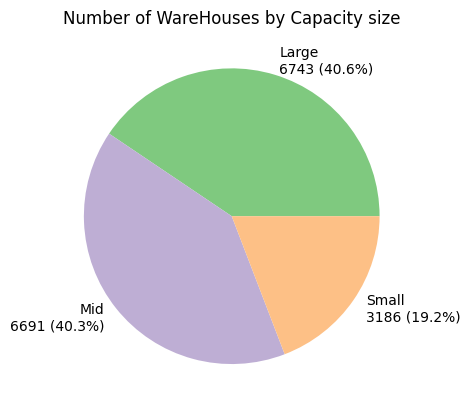

In [16]:
capacity_count = df.WH_capacity_size.value_counts()

total_cap = sum(capacity_count)
cap_percentages = [(size_cap / total_cap) * 100 for size_cap in capacity_count]

count_percent = [f'{label}\n{size} ({percentage:.1f}%)' for 
                label, size, percentage in zip(capacity_count.index, capacity_count, cap_percentages)]

plt.pie(x = capacity_count, labels = count_percent, colors = palette_color )

plt.title('Number of WareHouses by Capacity size')

plt.show()

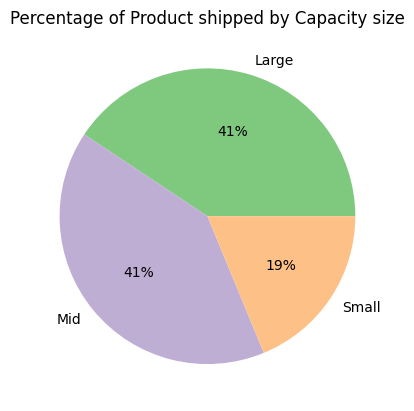

In [18]:
capacity_group = df.groupby(['WH_capacity_size'])

capacity_group_sum = capacity_group.sum(numeric_only = True)

plt.pie(x = capacity_group_sum['product_wg_ton'], labels = capacity_group_sum['product_wg_ton'].index, 
        autopct = '%.0f%%', colors = palette_color)

plt.title('Percentage of Product shipped by Capacity size')

plt.show()

#### About 81% of warehouses have large or mid-range capacity, and they handle about 82% of the products that are transported from here.

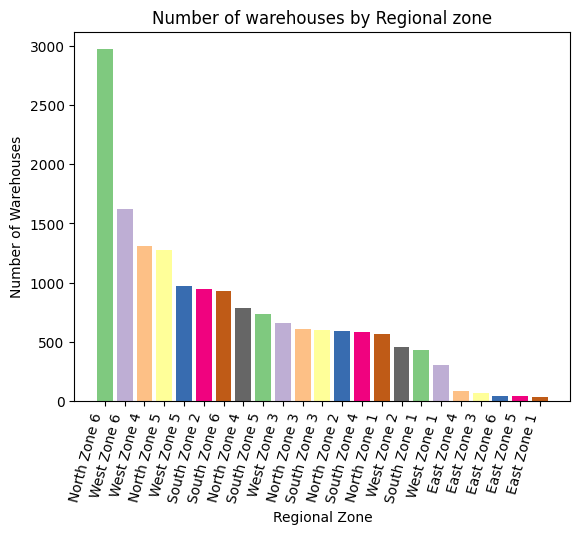

In [19]:
df['Regional_zone'] = df['zone'] + ' ' + df['WH_regional_zone']

zone_count = df.Regional_zone.value_counts()

plt.bar(x = zone_count.index ,height = zone_count, color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('Number of Warehouses')

plt.title('Number of warehouses by Regional zone')

plt.show()

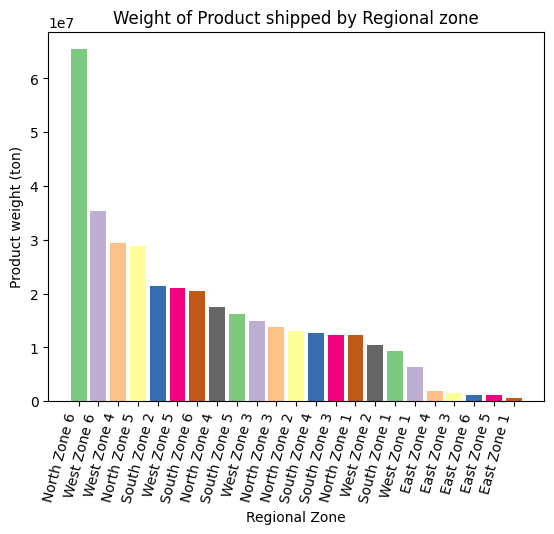

In [30]:
zone_group = df.groupby(['Regional_zone'])

zone_group_sum = zone_group.sum(numeric_only = True)

plt.bar(x = zone_group_sum['product_wg_ton'].sort_values(ascending = False).index, 
        height = zone_group_sum['product_wg_ton'].sort_values(ascending = False) , color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('Product weight (ton)')

plt.title('Weight of Product shipped by Regional zone')

plt.show()

### North Zone 6 has the highest number of warehouses, followed by West Zone 6. This pattern of distribution is also showed in the transportation of products by weight.





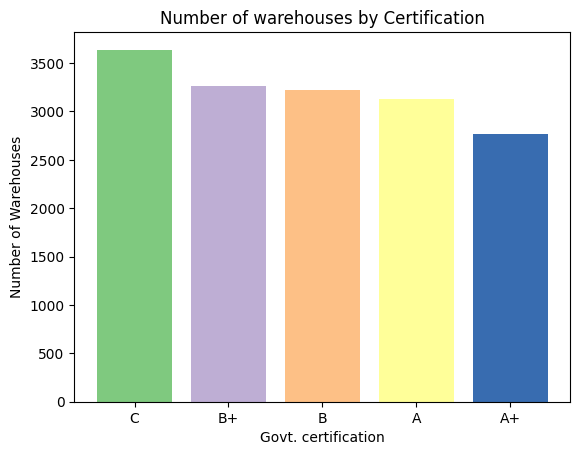

In [20]:
cert_count = df.approved_wh_govt_certificate.value_counts()

plt.bar(x = cert_count.index ,height = cert_count, color = palette_color)

plt.xlabel('Govt. certification')

plt.ylabel('Number of Warehouses')

plt.title('Number of warehouses by Certification')

plt.show()


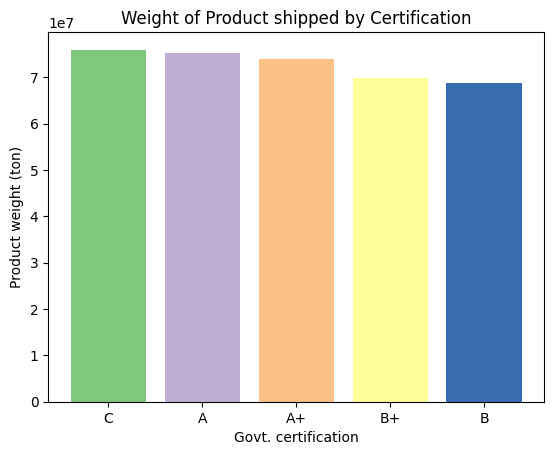

In [26]:
cert_group = df.groupby(['approved_wh_govt_certificate'])

cert_group_sum = cert_group.sum(numeric_only = True)

plt.bar(x = cert_group_sum['product_wg_ton'].sort_values(ascending = False).index, 
        height = cert_group_sum['product_wg_ton'].sort_values(ascending = False) , color = palette_color)

plt.xlabel('Govt. certification')

plt.ylabel('Product weight (ton)')

plt.title('Weight of Product shipped by Certification')

plt.show()

In [27]:
min_weight = df['product_wg_ton'].min()
print(f"Min. product weight shipped = {min_weight} ton\n")

max_weight = df['product_wg_ton'].max()
print(f"Max. product weight shipped = {max_weight} ton\n")

avg_weight = np.round(df['product_wg_ton'].mean())
print(f"Avg. product weight shipped = {avg_weight} ton\n")

Min. product weight shipped = 2093 ton

Max. product weight shipped = 55151 ton

Avg. product weight shipped = 22098.0 ton



In [28]:
printmd('**Details of warehouse having most number of Competitors** \n')

df[df['Competitor_in_mkt'] == df['Competitor_in_mkt'].max()]

**Details of warehouse having most number of Competitors** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
1568,1568,WH_101568,EID_51568,Rural,Small,East,Zone 6,8,0,12,4642,Rented,37,0,0,1,208,19.0,2020.0,6,1,C,1,15,8131,East Zone 6


##### The warehouse with the most competitors in the market is located in the countryside, notably in East Zone 6. The weight of products transported from this warehouse exceeds the minimal value but falls far short of the average weight of products shipped. This shows that, while facing severe competition in its market, the warehouse manages to maintain a level of product shipment that, although not the highest, is nevertheless over the minimum. Even in a competitive rural setting, this could suggest efficient operations and market viability.

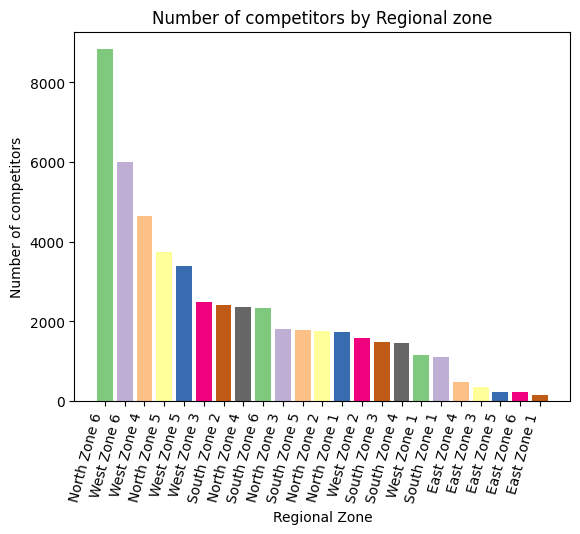

In [31]:
plt.bar(x = zone_group_sum['Competitor_in_mkt'].sort_values(ascending = False).index, 
        height = zone_group_sum['Competitor_in_mkt'].sort_values(ascending = False) , color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('Number of competitors')

plt.title('Number of competitors by Regional zone')

plt.show()

####  North Zone 6 has the highest number of competitors, and east zone with the least number of competitors. This shows that North Zone 6 is a highly competitive market, with more businesses or warehouses competing for market share. On the other hand, East Zone appears to have fewer competitors.

In [35]:
print(f"Min. No. of workers = {df['workers_num'].min()}\n")

print(f"Max. No. of workers = {df['workers_num'].max()} \n")

print(f"Avg. No. of workers = {np.round((df['workers_num'].mean()))}")

Min. No. of workers = 10.0

Max. No. of workers = 98.0 

Avg. No. of workers = 29.0


In [34]:
printmd('**Details of warehouses having most number of workers** \n')

greater_60 = df[df['workers_num'] > 60]

greater_60

**Details of warehouses having most number of workers** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
266,266,WH_100266,EID_50266,Rural,Large,North,Zone 6,4,0,4,4943,Rented,30,0,0,1,183,62.0,2021.0,0,0,NaN,0,23,6123,North Zone 6
430,430,WH_100430,EID_50430,Rural,Large,West,Zone 5,3,0,4,3896,Rented,17,1,0,0,251,98.0,2009.0,16,1,B+,4,14,21144,West Zone 5
1101,1101,WH_101101,EID_51101,Rural,Mid,South,Zone 4,5,0,2,5650,Rented,52,1,0,1,201,61.0,2005.0,25,0,A,2,26,32085,South Zone 4
1757,1757,WH_101757,EID_51757,Rural,Small,West,Zone 6,4,0,2,5981,Rented,26,1,0,0,97,78.0,2010.0,22,0,B+,5,8,28110,West Zone 6
2569,2569,WH_102569,EID_52569,Rural,Small,North,Zone 6,5,3,2,5183,Rented,47,0,0,1,141,62.0,NaN,4,0,B,5,8,5087,North Zone 6
2859,2859,WH_102859,EID_52859,Rural,Large,South,Zone 5,4,0,3,4387,Company Owned,55,1,0,1,92,92.0,2015.0,16,1,A+,5,10,24117,South Zone 5
2907,2907,WH_102907,EID_52907,Rural,Small,South,Zone 6,7,0,2,4943,Company Owned,29,0,0,1,105,65.0,2013.0,20,0,B,1,2,24070,South Zone 6
3073,3073,WH_103073,EID_53073,Rural,Large,North,Zone 6,2,0,3,5368,Company Owned,70,0,0,1,92,64.0,NaN,24,1,B,5,28,30068,North Zone 6
3275,3275,WH_103275,EID_53275,Rural,Mid,South,Zone 2,2,0,4,5840,Rented,40,0,0,1,201,62.0,NaN,5,1,A,3,32,7066,South Zone 2
3513,3513,WH_103513,EID_53513,Urban,Large,South,Zone 6,4,0,1,4105,Company Owned,37,1,0,1,128,92.0,2014.0,13,0,A,1,29,18140,South Zone 6


In [36]:
most_avg = greater_60['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having most number of workers = {most_avg} ton\n")

mg_count = df.loc[(df['workers_num'] > 60) & (df['product_wg_ton'] > avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped greater than the average = {mg_count} \n")

ml_count = df.loc[(df['workers_num'] > 60) & (df['product_wg_ton'] < avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped less than the average = {ml_count} \n")

Avg. of product weight shipped from warehouse having most number of workers = 19554.485714285714 ton

No. of warehouses having product weight shipped greater than the average = 15 

No. of warehouses having product weight shipped less than the average = 20 



In [37]:
printmd('**Details of warehouse having least number of workers** \n')

df[df['workers_num'] < 20]


**Details of warehouse having least number of workers** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
11,11,WH_100011,EID_50011,Rural,Large,North,Zone 6,7,0,5,4627,Rented,40,0,0,0,225,16.0,2017.0,11,0,B,2,28,14115,North Zone 6
15,15,WH_100015,EID_50015,Rural,Mid,North,Zone 2,1,1,3,5062,Company Owned,50,0,0,1,190,19.0,NaN,4,0,B+,3,12,5094,North Zone 2
30,30,WH_100030,EID_50030,Rural,Mid,West,Zone 4,5,0,4,4552,Rented,67,0,0,0,230,17.0,2017.0,12,0,B+,5,11,15082,West Zone 4
31,31,WH_100031,EID_50031,Rural,Large,North,Zone 6,4,0,2,3540,Rented,21,0,0,0,164,19.0,2009.0,18,1,B+,6,23,21064,North Zone 6
53,53,WH_100053,EID_50053,Rural,Mid,North,Zone 2,6,1,2,3943,Rented,38,0,0,0,190,19.0,2008.0,18,0,A,4,1,23149,North Zone 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,16571,WH_116571,EID_66571,Rural,Small,South,Zone 6,8,0,4,4895,Rented,57,0,0,0,174,18.0,NaN,26,0,B+,5,9,30146,South Zone 6
16578,16578,WH_116578,EID_66578,Rural,Large,North,Zone 6,7,0,4,4749,Rented,35,0,0,0,57,18.0,2004.0,24,1,A+,6,28,34079,North Zone 6
16584,16584,WH_116584,EID_66584,Rural,Mid,West,Zone 4,0,0,3,5863,Rented,44,0,0,0,222,19.0,NaN,24,0,A,2,11,30129,West Zone 4
16611,16611,WH_116611,EID_66611,Rural,Mid,North,Zone 3,0,1,4,4333,Company Owned,17,0,0,0,196,19.0,NaN,13,0,A,4,19,18113,North Zone 3


In [38]:
most_avg = df[df['workers_num'] < 20]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having least number of workers = {most_avg} ton\n")

lg_count = df.loc[(df['workers_num'] < 20) & (df['product_wg_ton'] > avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped greater than the average = {lg_count} \n")

ll_count = df.loc[(df['workers_num'] < 20) & (df['product_wg_ton'] < avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped less than the average = {ll_count} \n")

Avg. of product weight shipped from warehouse having least number of workers = 22673.5193220339 ton

No. of warehouses having product weight shipped greater than the average = 764 

No. of warehouses having product weight shipped less than the average = 709 



#### 
Based on worker counts and product weight shipped, the data reveals diverse tendencies among warehouses. To begin, 35 warehouses with more than 70 employees stand out. Surprisingly, despite their large workforces, the average product weight transported from these warehouses is lower than the overall average, indicating potential efficiency issues in managing the workforce-productivity balance.
Furthermore, a subset of 20 warehouses falls short of the overall average in terms of product weight sent, while 15 exceed it. This variance among warehouses shows that operational effectiveness and market demands differ.
On the opposite end of the scale, a large part of the 1,475 warehouses employ fewer than 20 people, while having a little greater average product weight transported than the overall average. This exciting discovery highlights the possibility of small, efficient operations in smaller workforce contexts.
In this context, 764 of the 1,475 warehouses with fewer than 20 employees outperform the overall average for product weight shipped, while 709 fall short. This suggests that smaller teams, when well managed, can excel in product dispatches, whereas larger teams may require additional optimisation.







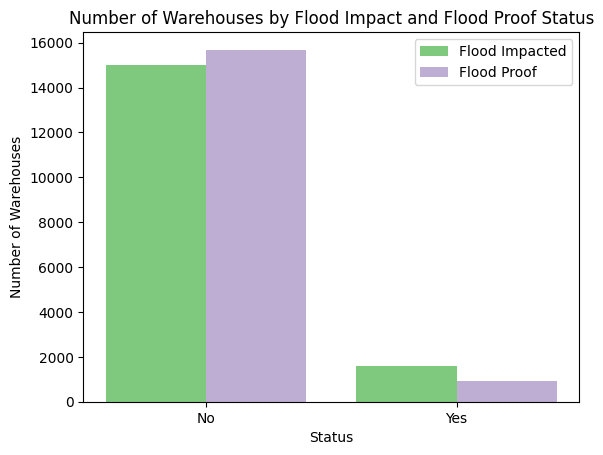

In [39]:
fi_count = df['flood_impacted'].value_counts()
fp_count = df['flood_proof'].value_counts()

index = fi_count.index
labels = ["Yes" if value == 1 else "No" for value in index]

X_axis = np.arange(2)

bar_width = 0.4

plt.bar(X_axis - bar_width / 2, fi_count, bar_width, label='Flood Impacted', color=palette_color[0])
plt.bar(X_axis + bar_width / 2, fp_count, bar_width, label='Flood Proof', color=palette_color[1])

plt.xlabel('Status')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses by Flood Impact and Flood Proof Status')
plt.xticks(X_axis, labels)
plt.legend()

plt.show()


In [40]:
avg_req = np.round(df['num_refill_req_l3m'].mean())
print(f"Avg. number of refill requets in last 3 months = {avg_req} \n")


avg_transport = np.round(df['transport_issue_l1y'].mean())
print(f"Avg. number of transport issued for last 1 year = {avg_transport} \n")

Avg. number of refill requets in last 3 months = 4.0 

Avg. number of transport issued for last 1 year = 1.0 



In [41]:
print(f"Min. No. of retail shops = {df['retail_shop_num'].min()}\n")

print(f"Max. No. of retail shops = {df['retail_shop_num'].max()} \n")

print(f"Avg. No. of retail shops = {np.round((df['retail_shop_num'].mean()))}")

Min. No. of retail shops = 1821

Max. No. of retail shops = 11008 

Avg. No. of retail shops = 4984.0


In [42]:
printmd('**Details of warehouses having least number of retail shops** \n')

less_3k = df[df['retail_shop_num'] < 2500]

less_3k

**Details of warehouses having least number of retail shops** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
815,815,WH_100815,EID_50815,Rural,Mid,South,Zone 4,7,0,5,2487,Company Owned,20,0,0,1,153,21.0,2021.0,5,1,C,1,26,6139,South Zone 4
2269,2269,WH_102269,EID_52269,Rural,Large,North,Zone 6,0,1,2,1980,Rented,54,0,0,1,123,36.0,NaN,16,0,B+,4,23,19078,North Zone 6
2678,2678,WH_102678,EID_52678,Rural,Large,North,Zone 6,6,0,3,2413,Company Owned,59,0,0,0,152,23.0,2011.0,19,0,B+,4,28,22071,North Zone 6
2909,2909,WH_102909,EID_52909,Rural,Mid,North,Zone 2,4,0,5,2438,Rented,44,0,0,1,105,24.0,2009.0,19,1,A+,6,18,24086,North Zone 2
2982,2982,WH_102982,EID_52982,Rural,Large,North,Zone 6,4,3,5,1905,Rented,51,0,0,0,219,19.0,2017.0,5,1,B,2,28,6106,North Zone 6
3807,3807,WH_103807,EID_53807,Rural,Mid,West,Zone 3,1,0,4,2385,Company Owned,44,0,0,1,87,35.0,NaN,24,0,A+,4,19,32064,West Zone 3
4312,4312,WH_104312,EID_54312,Rural,Mid,West,Zone 4,4,0,4,2148,Company Owned,57,0,0,1,56,52.0,2023.0,0,0,NaN,0,26,6107,West Zone 4
4659,4659,WH_104659,EID_54659,Rural,Mid,North,Zone 4,7,1,3,1871,Rented,50,0,0,0,191,27.0,NaN,4,1,C,3,26,6131,North Zone 4
4747,4747,WH_104747,EID_54747,Rural,Mid,South,Zone 4,4,3,1,2453,Company Owned,69,1,0,1,240,23.0,NaN,14,1,A+,3,26,19105,South Zone 4
5359,5359,WH_105359,EID_55359,Rural,Large,South,Zone 5,5,0,1,2314,Company Owned,45,0,0,1,239,28.0,2008.0,17,0,B,2,14,21146,South Zone 5


In [43]:
rsl_count = df.loc[(df['retail_shop_num'] < 2500), 'Ware_house_ID'].count()
print(f"No. of warehouses having least number of retail shops = {rsl_count} \n")

rsl_avg = df[df['retail_shop_num'] < 2500]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having least number retail shops = {rsl_avg} ton\n")


No. of warehouses having least number of retail shops = 50 

Avg. of product weight shipped from warehouse having least number retail shops = 23845.68 ton



In [44]:
printmd('**Details of warehouses having most number of retail shops** \n')

greater_9k = df[df['retail_shop_num'] > 9000]

greater_9k


**Details of warehouses having most number of retail shops** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
283,283,WH_100283,EID_50283,Rural,Mid,West,Zone 3,8,0,4,9581,Company Owned,23,0,0,1,218,28.0,NaN,4,0,A,1,19,5059,West Zone 3
825,825,WH_100825,EID_50825,Rural,Large,North,Zone 6,2,0,2,9389,Company Owned,42,0,0,0,155,26.0,NaN,23,0,A,4,28,31060,North Zone 6
1409,1409,WH_101409,EID_51409,Rural,Small,South,Zone 6,4,0,2,9630,Company Owned,41,0,0,1,267,37.0,2013.0,12,1,B,1,9,15087,South Zone 6
1749,1749,WH_101749,EID_51749,Rural,Small,South,Zone 6,5,0,2,9318,Company Owned,36,0,1,1,187,30.0,2012.0,14,0,C,4,15,19112,South Zone 6
2340,2340,WH_102340,EID_52340,Rural,Small,West,Zone 6,7,0,3,9094,Rented,34,0,0,1,95,25.0,2012.0,18,0,B,3,15,23136,West Zone 6
2666,2666,WH_102666,EID_52666,Rural,Small,South,Zone 6,5,0,2,9007,Company Owned,29,0,0,1,176,55.0,2000.0,31,1,A+,3,9,44101,South Zone 6
2883,2883,WH_102883,EID_52883,Rural,Small,South,Zone 6,5,0,3,9431,Company Owned,41,1,0,1,92,37.0,2011.0,19,1,A+,4,2,24133,South Zone 6
2952,2952,WH_102952,EID_52952,Rural,Small,South,Zone 6,7,0,2,9694,Company Owned,58,0,0,1,255,27.0,2011.0,22,1,A+,5,15,30144,South Zone 6
3105,3105,WH_103105,EID_53105,Rural,Small,South,Zone 6,5,0,2,9194,Rented,65,0,0,1,147,32.0,2011.0,18,0,B+,5,2,20081,South Zone 6
3945,3945,WH_103945,EID_53945,Rural,Mid,South,Zone 2,7,0,3,9187,Company Owned,69,0,0,1,108,33.0,2012.0,20,0,C,4,22,25100,South Zone 2


In [45]:
rsg_count = df.loc[(df['retail_shop_num'] > 9000), 'Ware_house_ID'].count()
print(f"No. of warehouses having most number of retail shops = {rsg_count} \n")

rsg_avg = df[df['retail_shop_num'] < 9000]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having most number retail shops = {rsg_avg} ton\n")

No. of warehouses having most number of retail shops = 51 

Avg. of product weight shipped from warehouse having most number retail shops = 22093.691713440763 ton



In [46]:
printmd('**Details of warehouse of having most weight of product shipped** \n')

df[df['product_wg_ton'] == df['product_wg_ton'].max()]

**Details of warehouse of having most weight of product shipped** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
9426,9426,WH_109426,EID_59426,Rural,Mid,South,Zone 3,2,0,2,5190,Company Owned,56,0,0,1,144,33.0,NaN,39,1,A,3,19,55151,South Zone 3


In [47]:
printmd('**Details of warehouse of having lowest weight of product shipped** \n')

df[df['product_wg_ton'] == df['product_wg_ton'].min()]

**Details of warehouse of having lowest weight of product shipped** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
8602,8602,WH_108602,EID_58602,Rural,Large,North,Zone 6,1,5,3,5904,Company Owned,43,0,0,0,231,23.0,NaN,0,0,NaN,0,23,2093,North Zone 6


##### In terms of product weight shipped, the data shows an intriguing distribution trend. Warehouses with the lowest and highest product weight transported are generally found in rural locations, showing a broad range of performance in these areas.
WH_108602, located in North Zone 6, is one notable example. Surprisingly, WH_108602 has the lowest product weight transported of any of the warehouses. This highlights the large difference in performance between warehouses, with WH_108602 displaying difficulties in obtaining significant product shipments.
In comparison, another notable warehouse is WH_109426 in South Zone 3, which employs 33 people, four more than the national average. The most shipped warehouse in terms of product weight is WH_109426, demonstrating its efficiency and effective labour utilisation.



In [48]:
average = df['product_wg_ton'].mean()

print(f"No. of Warehouses shipped product weight greater than overall average = {(df['product_wg_ton'] > average).sum()}\n")

print(f"No. of Warehouses shipped product weight less than overall average = {(df['product_wg_ton'] < average).sum()}")

No. of Warehouses shipped product weight greater than overall average = 8313

No. of Warehouses shipped product weight less than overall average = 8307


## Data Analysis for Model Building



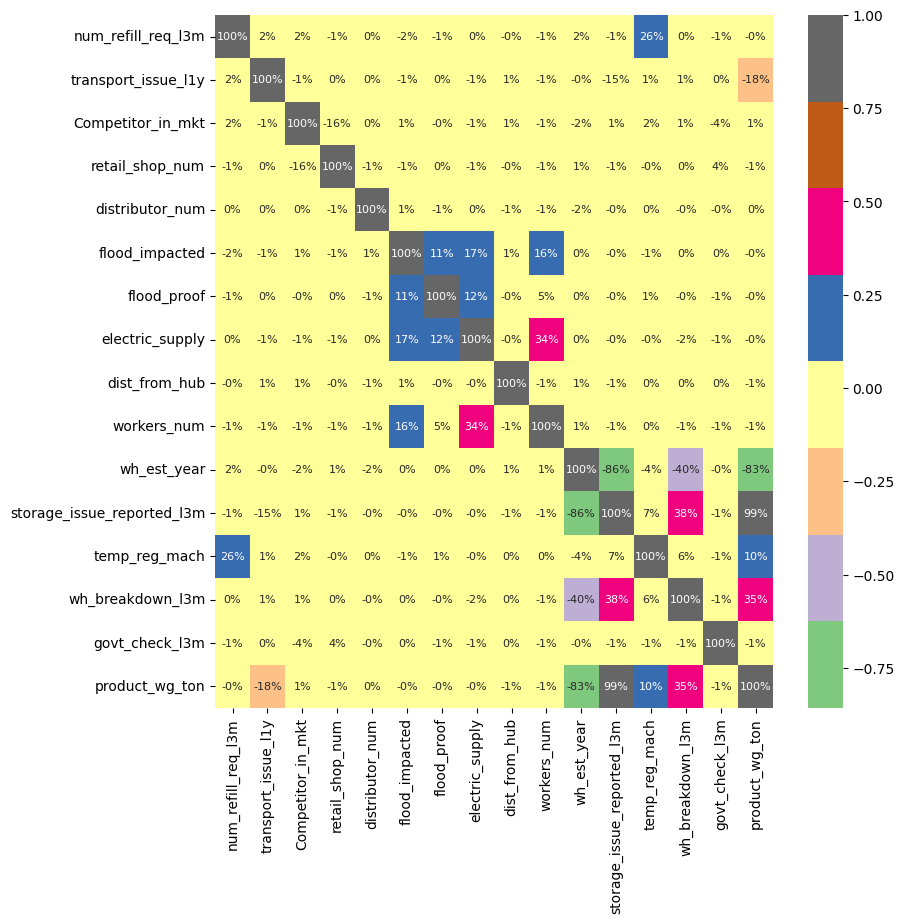

In [49]:
num_col = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
           'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
           'storage_issue_reported_l3m', 'temp_reg_mach' , 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

correlation = df[num_col].corr()

plt.figure(figsize = (9,9))

sns.heatmap(correlation, annot = True, annot_kws={"fontsize":8}, fmt=".0%", cmap= palette_color)

plt.show()

### "After doing a thorough investigation, we discovered three numerical features that have relationships with 'product weight shipped.' These main characteristics are as follows:
To begin, a positive association exists between 'Storage issue reported in the last 3 months' and 'product weight shipped.' This shows that an increase in reported storage concerns corresponds to a higher volume of product weight sent.However, 'Warehouse establishment year' has a negative connection with 'product weight shipped.' This illustrates that as a warehouse's establishment year advances, the volume of product weight shipped from that warehouse decreases.Finally, a moderate positive association of roughly 35% exists between 'Warehouse breakdown' and 'product weight sent.' Although this link is weaker, it suggests a favourable relationship between warehouse breakdown events and the amount of product weight transported.With these findings in mind, we elected to train our predictive model using these three numerical features. They have the ability to improve our understanding and forecasting of product shipment patterns within warehouses, resulting in better warehouse management and logistics planning.



Text(0.5, 1.0, 'Product weight by Location')

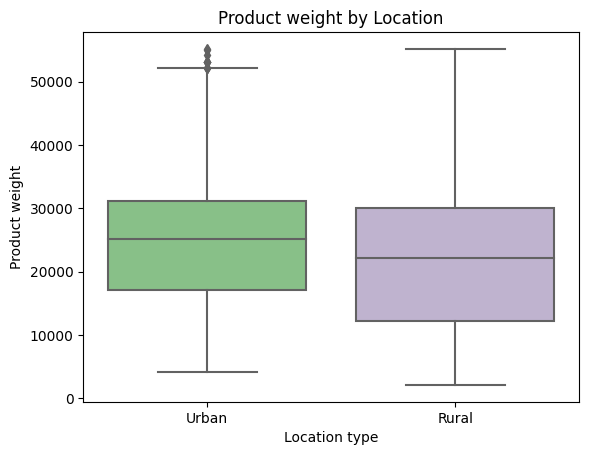

In [50]:
sns.boxplot(data = df, x= df['Location_type'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Location type')

plt.ylabel('Product weight')

plt.title('Product weight by Location')

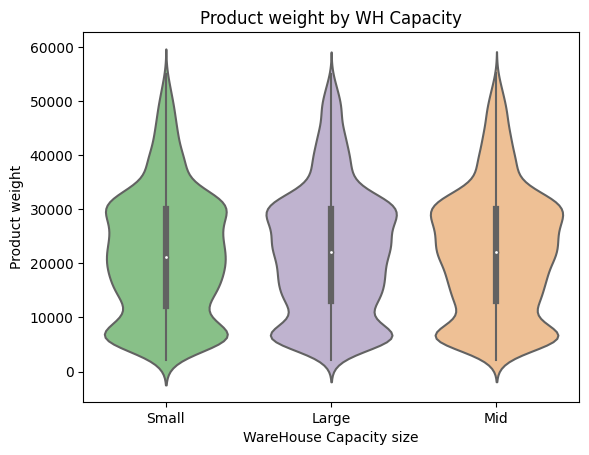

In [51]:
sns.violinplot(data = df, x= df['WH_capacity_size'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('WareHouse Capacity size')

plt.ylabel('Product weight')

plt.title('Product weight by WH Capacity')

plt.show()

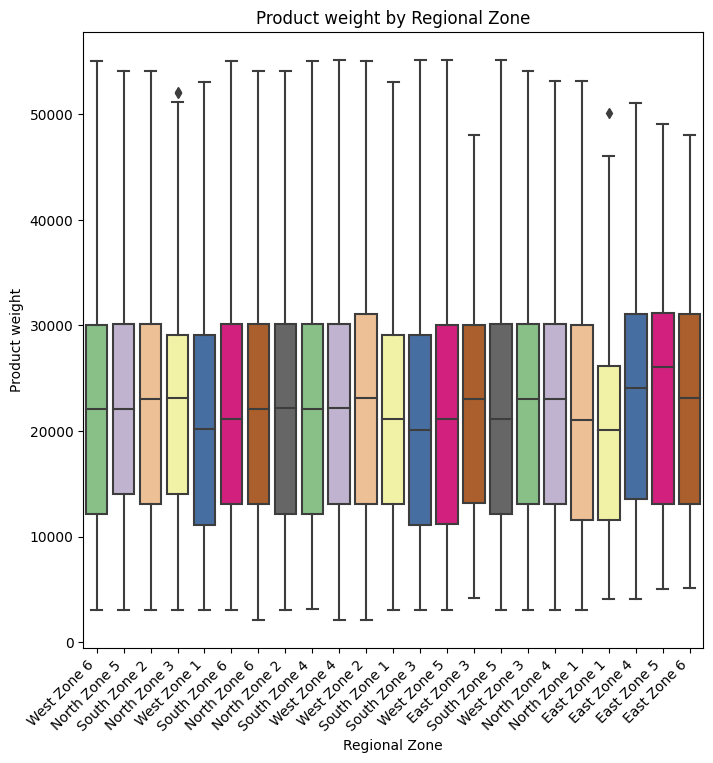

In [52]:
plt.figure(figsize = (8,8))

sns.boxplot(data = df, x= df['Regional_zone'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Regional Zone')

plt.ylabel('Product weight')

plt.title('Product weight by Regional Zone')

plt.xticks(rotation=45, ha='right')

plt.show()

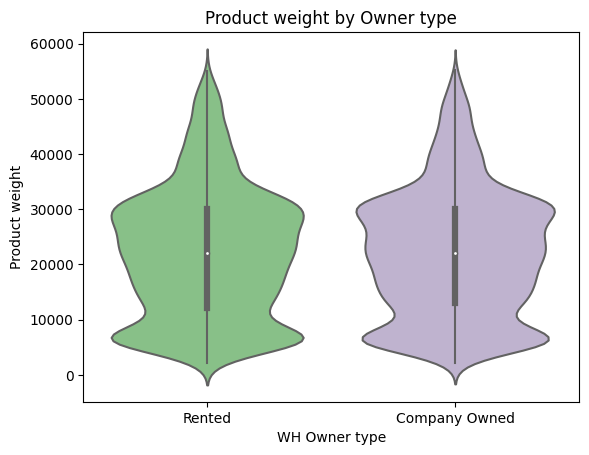

In [53]:
sns.violinplot(data = df, x= df['wh_owner_type'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('WH Owner type')

plt.ylabel('Product weight')

plt.title('Product weight by Owner type')

plt.show()

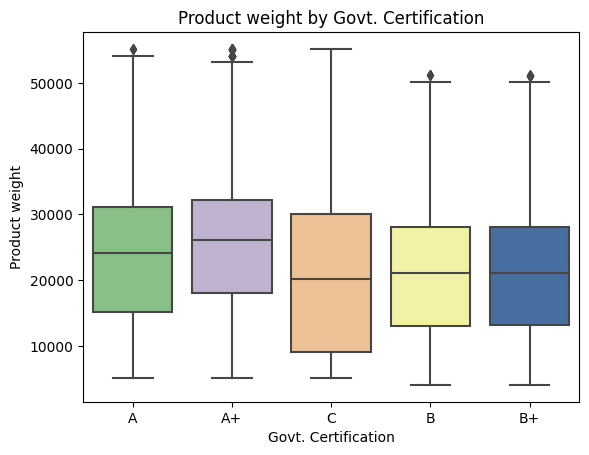

In [54]:
sns.boxplot(data = df, x= df['approved_wh_govt_certificate'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Govt. Certification')

plt.ylabel('Product weight')

plt.title('Product weight by Govt. Certification')

plt.show()

In [55]:
train_df = df[['wh_est_year', 'storage_issue_reported_l3m','wh_breakdown_l3m','Location_type',
               'WH_capacity_size','wh_owner_type', 'approved_wh_govt_certificate','Regional_zone','product_wg_ton']]

In [56]:
train_df.head()

,wh_est_year,storage_issue_reported_l3m,wh_breakdown_l3m,Location_type,WH_capacity_size,wh_owner_type,approved_wh_govt_certificate,Regional_zone,product_wg_ton
0,NaN,13,5,Urban,Small,Rented,A,West Zone 6,17115
1,NaN,4,3,Rural,Large,Company Owned,A,North Zone 5,5074
2,NaN,17,6,Rural,Mid,Company Owned,A,South Zone 2,23137
3,NaN,17,3,Rural,Mid,Rented,A+,North Zone 3,22115
4,2009.0,18,6,Rural,Large,Company Owned,C,North Zone 5,24071


In [57]:
train_df.isnull().sum()

wh_est_year                     7860
storage_issue_reported_l3m         0
wh_breakdown_l3m                   0
Location_type                      0
WH_capacity_size                   0
wh_owner_type                      0
approved_wh_govt_certificate     599
Regional_zone                      0
product_wg_ton                     0
dtype: int64

In [58]:
train_year = train_df['wh_est_year'].mode()[0]

train_certificate = train_df['approved_wh_govt_certificate'].mode()[0]

train_df.loc[train_df['wh_est_year'].isnull(), 'wh_est_year'] = train_year

train_df.loc[train_df['approved_wh_govt_certificate'].isnull(), 'approved_wh_govt_certificate'] = train_certificate


In [61]:
train_year = train_df['wh_est_year'].mode()[0]

train_certificate = train_df['approved_wh_govt_certificate'].mode()[0]

train_df.loc[train_df['wh_est_year'].isnull(), 'wh_est_year'] = train_year

train_df.loc[train_df['approved_wh_govt_certificate'].isnull(), 'approved_wh_govt_certificate'] = train_certificate


In [62]:
def outlier_remover(data, columns):
    for col in columns:
        Q1  = data[f'{col}'].quantile(0.25)
        Q3  = data[f'{col}'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df_new = data[(data[f'{col}'] > lower) & (data[f'{col}'] < upper)]
        return df_new

In [63]:
numerical_columns = ['storage_issue_reported_l3m','wh_breakdown_l3m', 'product_wg_ton']

final_train_df = outlier_remover(train_df, numerical_columns)

In [64]:
final_train_df.shape

(16620, 9)

In [65]:
final_train_df.isnull().sum()

wh_est_year                     0
storage_issue_reported_l3m      0
wh_breakdown_l3m                0
Location_type                   0
WH_capacity_size                0
wh_owner_type                   0
approved_wh_govt_certificate    0
Regional_zone                   0
product_wg_ton                  0
dtype: int64

## Finally, the data analysis provides useful information about many elements of warehouse operations and distribution patterns. Some of the key outcomes are:

#### * The general availability of warehouses in rural areas, with 92% of warehouses located in such areas and 91% of products are transported from here.
#### * Most of warehouses, roughly 81%, have large or medium storage capacity and handle approximately 82% of all product shipments.
#### * The geographical distribution of warehouses is dominated by the North Zone 6, which is closely followed by the West Zone 6. 
#### * The most prevalent warehouse certification is C Government, with A+ certification being extremely uncommon. In terms of product shipments, however, C accredited warehouses surpass their B+ and A+ counterparts.
#### * The warehouse with the most opposition is in the countryside, especially East Zone 6. Despite strong competition, it maintains a large level of product shipments, demonstrating efficient operations in a competitive rural market.
#### * The most competitors are clustered in North Zone 6, while the least competition is found in East Zone, demonstrating regional differences in market dynamics.
#### * The diversity of warehouses is highlighted by an analysis of staff counts and product weight delivered. Larger workforces are not always associated with heavier product weights supplied, and smaller teams can thrive with competent management.
#### * Flood impact and flood-proofing methods differ by warehouse, with the majority of warehouses located in non-flood-prone locations and lacking flood-proofing systems.
#### * Warehouses have sent four refill requests on average in the last three months, reflecting the regularity of restocking requirements. Furthermore, the average number of transport requests issued per warehouse in the previous year is one, indicating a recurring requirement for transportation services.
#### * Warehouses with diverse numbers of retail stores have different average product weights sent, with some exceeding the total average and others almost matching it. These findings provide light on the connection between retail shop networks and product shipments.
#### * Notably, warehouse performance varies greatly, with some achieving significant product weights shipped while others struggle to sustain high shipment numbers.











## Overall, these findings help to improve understanding of warehouse operations, performance, and distribution dynamics, providing significant insights for informed decision-making and warehouse logistics management.